In [1]:
# data
import pandas as pd
import numpy as np

# viz
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import Campaign CSV
df_campaign = pd.read_csv("Resources/campaign.csv")
df_campaign.head(2)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_ids,sub_category_ids
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,cat2,subcat2


In [3]:
# Import Category CSV
df_category = pd.read_csv("Resources/category.csv")
df_category.head(2)

,category_ids,category
0,cat1,food
1,cat2,music


In [4]:
# Import Sub-Category CSV
df_subcategory = pd.read_csv("Resources/subcategory.csv")
df_subcategory.head(2)

,sub_category_ids,sub_category
0,subcat1,food trucks
1,subcat2,rock


In [5]:
# Import Contacts CSV
df_contacts = pd.read_csv("Resources/contacts.csv")
df_contacts.head(2)

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org


In [6]:
# Merge Category on Campaign so visualizations have clearer info
merged_df = pd.merge(df_campaign, df_category, on='category_ids', how='left')
merged_df.head(2)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_ids,sub_category_ids,category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1,food
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,cat2,subcat2,music


In [7]:
# Perform another merge for sub-category for data visualizations
merged_df_2 = pd.merge(merged_df, df_subcategory, on='sub_category_ids', how='left')
merged_df_2.head(2)

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launch_date,end_date,category_ids,sub_category_ids,category,sub_category
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,1970-01-01 00:00:01.581573600,1970-01-01 00:00:01.614578400,cat1,subcat1,food,food trucks
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,1970-01-01 00:00:01.611554400,1970-01-01 00:00:01.621918800,cat2,subcat2,music,rock


In [30]:
# Create our Category vs Avg(Backers) dataframe
cat_back = merged_df_2.groupby('category')['backers_count'].mean()

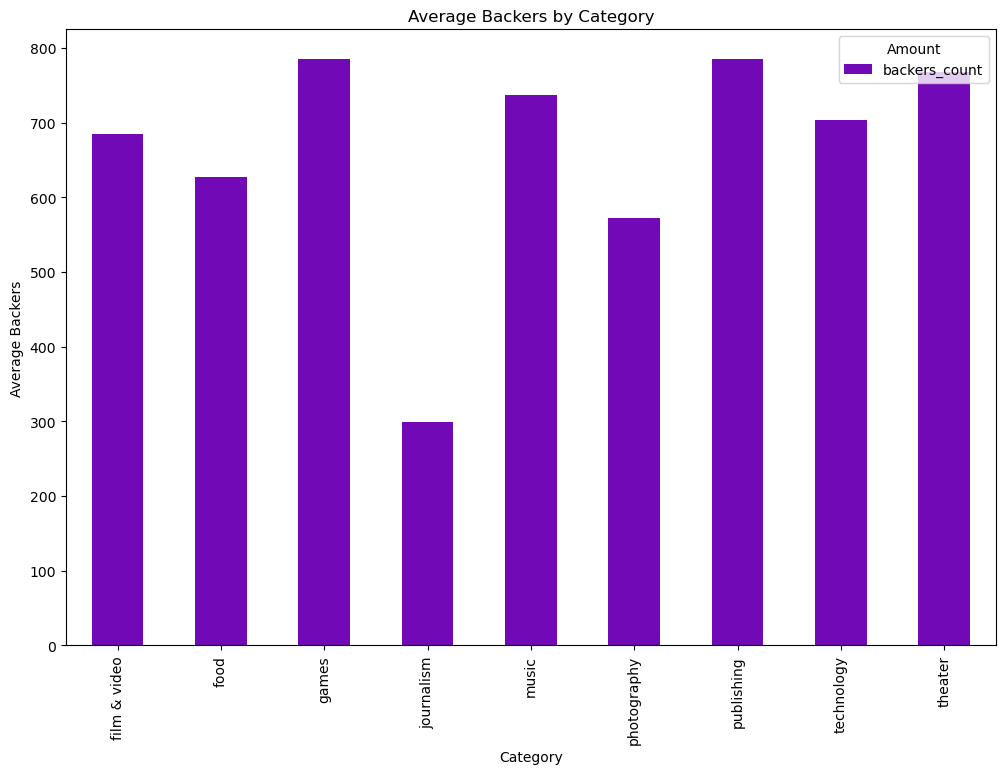

In [45]:
# Plot Category vs Avg(Backers)
colors = ['#7209b7']
cat_back.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Backers by Category')
plt.xlabel('Category')
plt.ylabel('Average Backers')
plt.legend(title='Amount', loc='upper right')
plt.show()

In [35]:
# Create our Sub-Category vs Avg(Backers) dataframe
sub_cat_back =  merged_df_2.groupby('sub_category')['backers_count'].mean()

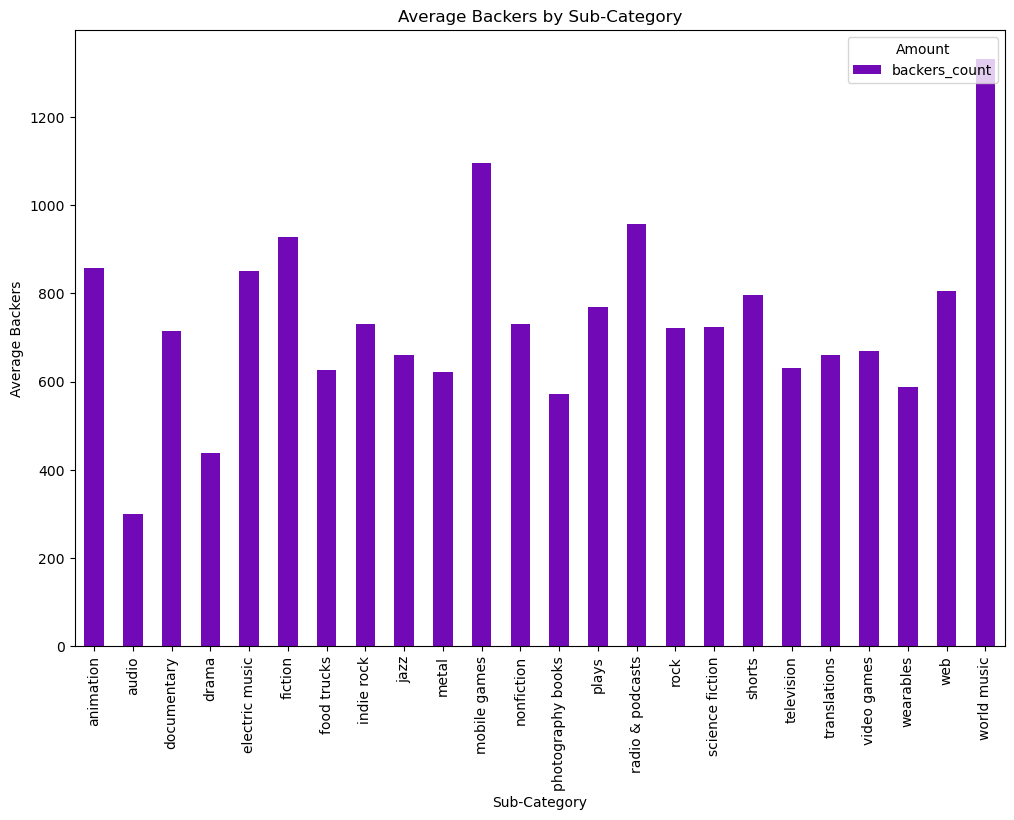

In [44]:
# Plot Sub-Category vs Avg(Backers)
colors = ['#7209b7']
sub_cat_back.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Average Backers by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Backers')
plt.legend(title='Amount', loc='upper right')
plt.show()

In [8]:
# Create our category data frame for our visualizations
category_data = merged_df_2.groupby('category')[['goal', 'pledged']].sum()

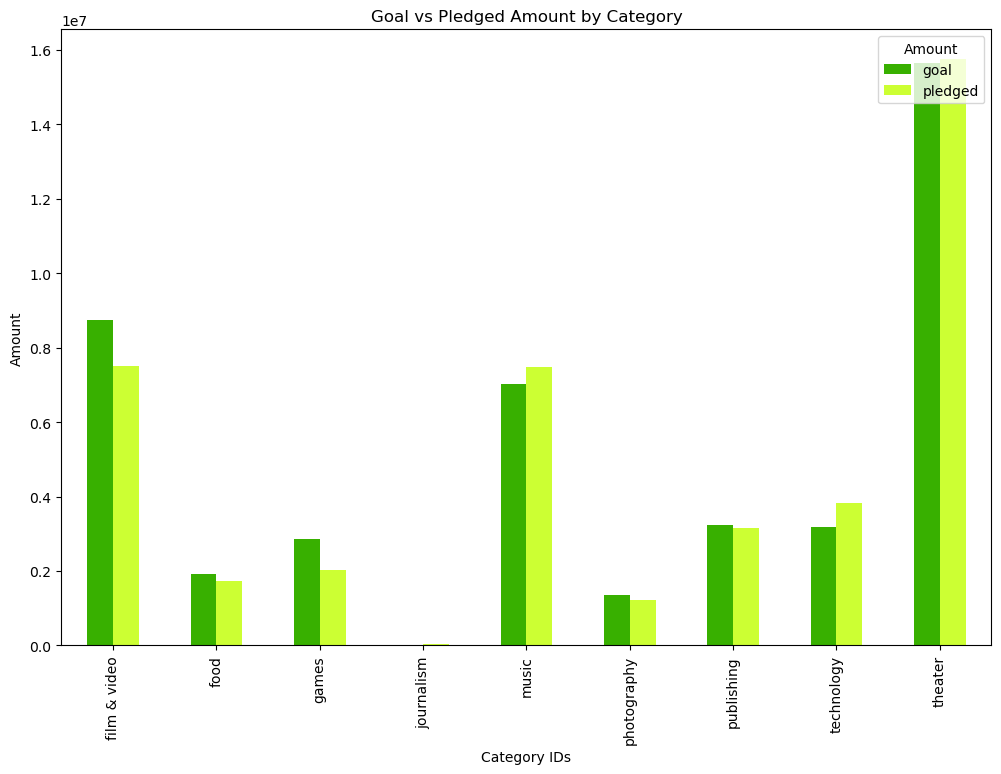

In [21]:
# Plotting the grouped bar chart by Category

colors = ['#38b000', '#ccff33'] 
category_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Goal vs Pledged Amount by Category')
plt.xlabel('Category IDs')
plt.ylabel('Amount')
plt.legend(title='Amount', loc='upper right')
plt.show()

In [10]:
# Create our sub-category dataframe for visualizations
sub_category_data = merged_df_2.groupby('sub_category')[['goal', 'pledged']].sum()

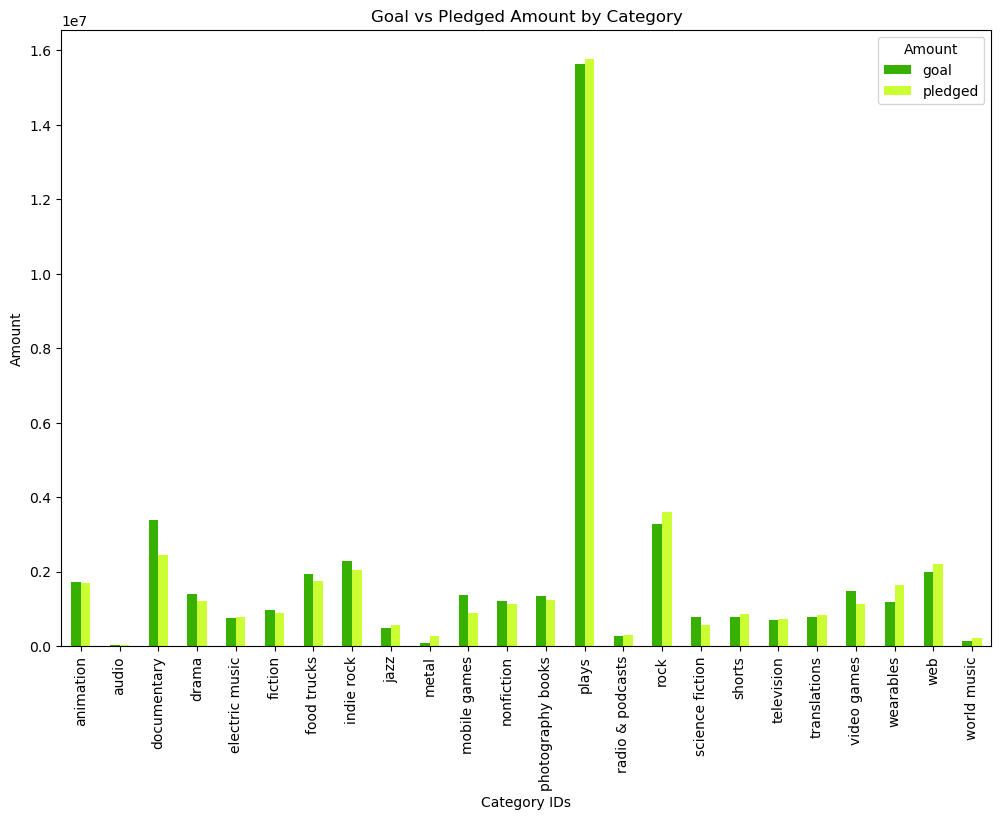

In [22]:
# Plotting the grouped bar chart by Sub-category

colors = ['#38b000', '#ccff33'] 
sub_category_data.plot(kind='bar', figsize=(12, 8), color=colors)
plt.title('Goal vs Pledged Amount by Category')
plt.xlabel('Category IDs')
plt.ylabel('Amount')
plt.legend(title='Amount', loc='upper right')
plt.show()

In [12]:
# Create our dataframe for Category vs Outcome data visualizations
category_outcome_count = merged_df_2.groupby(['category', 'outcome']).size().unstack(fill_value=0)

<Figure size 1200x800 with 0 Axes>

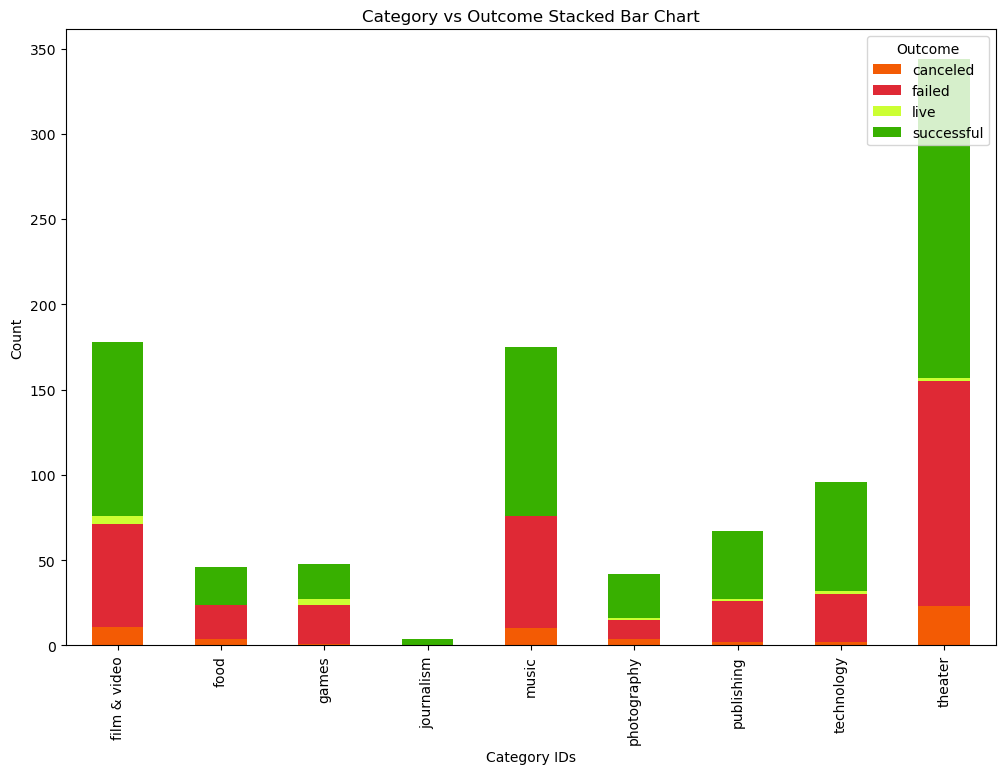

In [26]:
# Plot our stacked bar chart for Category vs Outcome
colors = ["#f35b04", "#df2935", '#ccff33', '#38b000'] 
plt.figure(figsize=(12, 8))
category_outcome_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Category vs Outcome Stacked Bar Chart')
plt.xlabel('Category IDs')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()

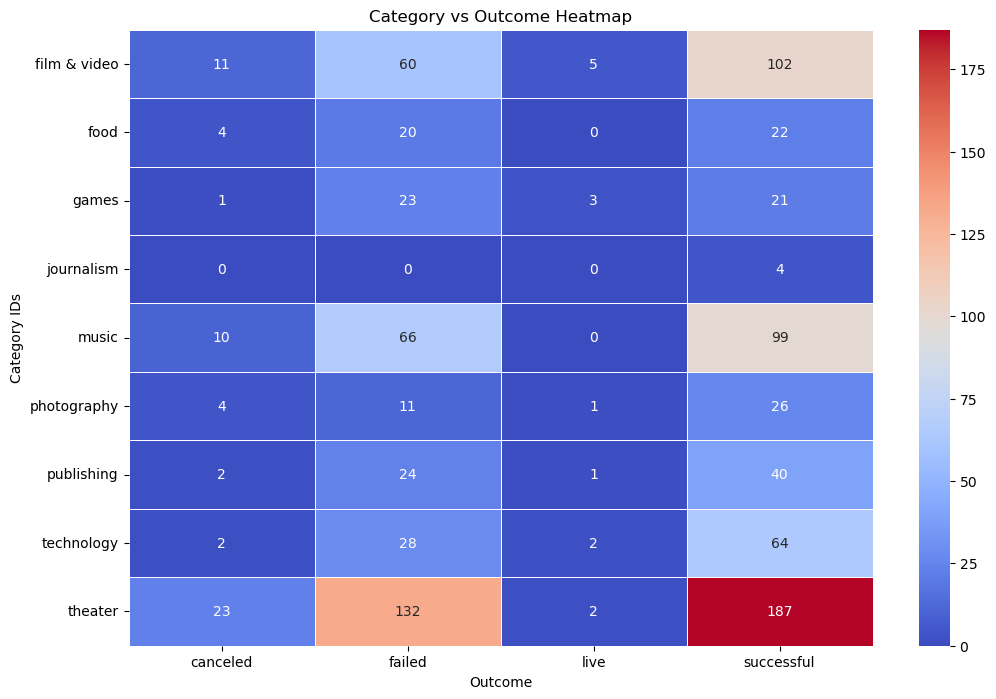

In [14]:
# Plotting the heatmap for Category vs Outcome
plt.figure(figsize=(12, 8))
sns.heatmap(category_outcome_count, cmap='coolwarm', annot=True, fmt='g', linewidths=.5)
plt.title('Category vs Outcome Heatmap')
plt.xlabel('Outcome')
plt.ylabel('Category IDs')
plt.show()

In [15]:
# Create our Sub-Category vs Outcome dataframe for visualizations
sub_category_outcome_count = merged_df_2.groupby(['sub_category', 'outcome']).size().unstack(fill_value=0)

<Figure size 1200x800 with 0 Axes>

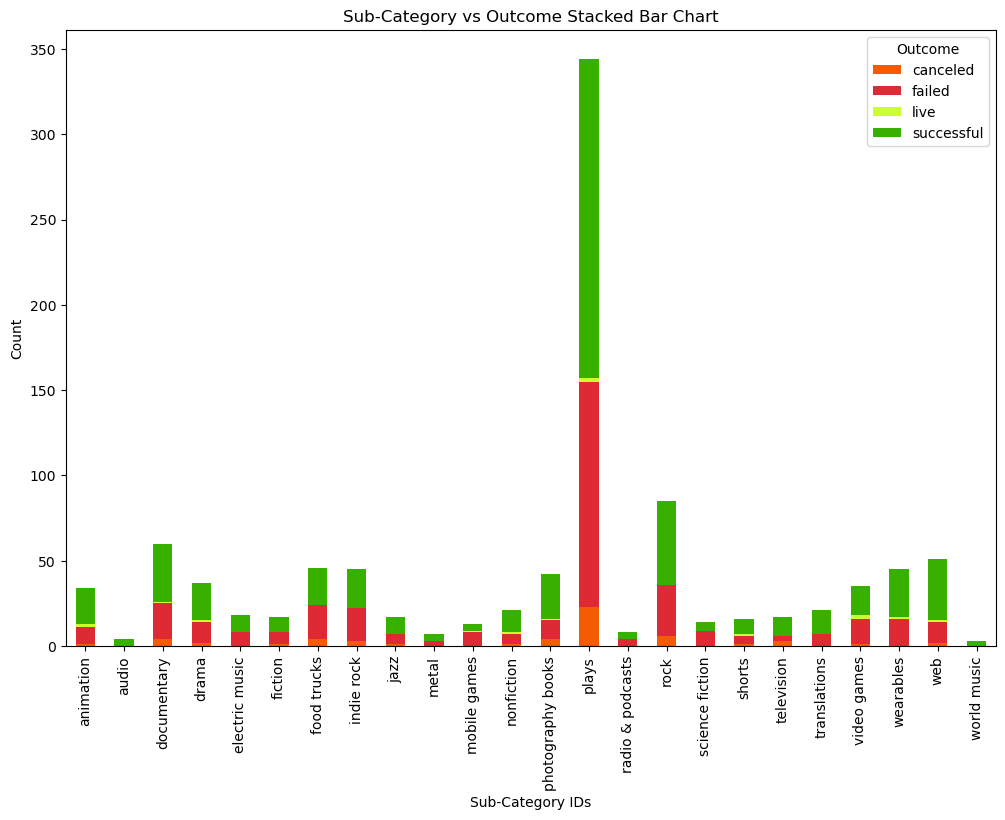

In [27]:
# Plot our stacked bar chart for Sub-Category vs Outcome
colors = ["#f35b04", "#df2935", '#ccff33', '#38b000'] 
plt.figure(figsize=(12, 8))
sub_category_outcome_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Sub-Category vs Outcome Stacked Bar Chart')
plt.xlabel('Sub-Category IDs')
plt.ylabel('Count')
plt.legend(title='Outcome', loc='upper right')
plt.show()

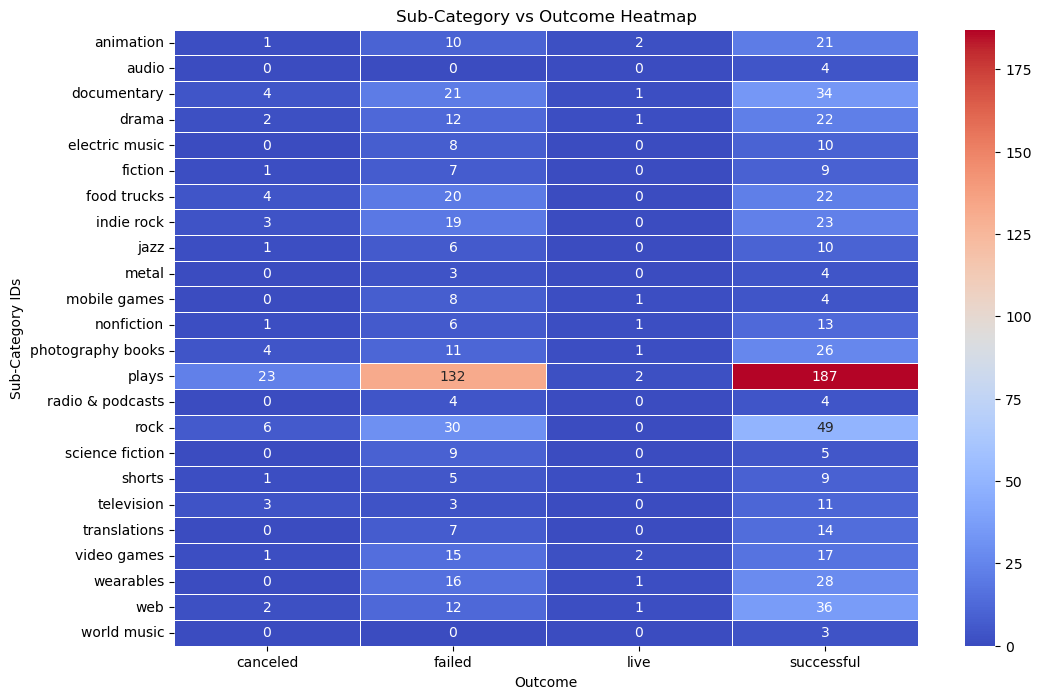

In [17]:
# Plotting the heatmap for Sub-Category vs Outcome
plt.figure(figsize=(12, 8))
sns.heatmap(sub_category_outcome_count, cmap='coolwarm', annot=True, fmt='g', linewidths=.5)
plt.title('Sub-Category vs Outcome Heatmap')
plt.xlabel('Outcome')
plt.ylabel('Sub-Category IDs')
plt.show()